# OCR 文本检测实战

本节将介绍如何使用PaddleOCR完成文本检测DB算法的训练与运行，包括：
1. 快速调用paddleocr包体验文本检测
1. 理解文本检测DB算法原理
2. 掌握文本检测模型构建流程
3. 掌握文本检测模型训练流程




# 1. 快速开始

本节以[paddleocr](https://pypi.org/project/paddleocr/)为例，介绍如何三个步骤快速实现文本检测。
1. 安装[paddleocr](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/doc/doc_ch/whl.md)
2. 一行命令运行DB算法得到检测结果
3. 可视化文本检测结果




**安装paddleocr whl包**

In [ ]:
!pip install --upgrade pip
!pip install paddleocr

**一行命令实现文本检测**

初次运行时，paddleocr会自动下载并使用PaddleOCR的[PP-OCRv2轻量级模型](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/README.md#pp-ocr-series-model-listupdate-on-september-8th)。

使用安装好的paddleocr 以./12.jpg为输入图像，将得到以下预测结果：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4e31d512f7e147d4847cb1a0ee27a8260ef05506c9254fc1b19137bab1831ac8"
width="200", height="400" ></center>

<br><center>图 12.jpg </center>

```
[[79.0, 555.0], [398.0, 542.0], [399.0, 571.0], [80.0, 584.0]]
[[21.0, 507.0], [512.0, 491.0], [513.0, 532.0], [22.0, 548.0]]
[[174.0, 458.0], [397.0, 449.0], [398.0, 480.0], [175.0, 489.0]]
[[42.0, 414.0], [482.0, 392.0], [484.0, 428.0], [44.0, 450.0]]
```
预测结果一共包含四个文本框，每一行包含四个坐标点，代表一个文本框的坐标集合，从左上角起以顺时针顺序排列。


paddleocr命令行调用文本检测模型预测图像./12.jpg的方式如下：


In [ ]:
import os
# 修改Aistudio代码运行的默认目录为 /home/aistudio/
os.chdir("/home/aistudio/")

In [ ]:
# --image_dir 指向要预测的图像路径  --rec false表示不使用识别识别，只执行文本检测
! paddleocr --image_dir ./12.jpg --rec false

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

In [ ]:
另外，除了命令行使用方式，paddleocr也提供了代码调用方式，如下：

In [ ]:
# 1. 从paddleocr中import PaddleOCR类
from paddleocr import PaddleOCR

# 2. 声明PaddleOCR类
ocr = PaddleOCR()  
img_path = './12.jpg'
# 3. 执行预测
result = ocr.ocr(img_path, rec=False)
print(f"The predicted text box of {img_path} are follows.")
print(result)


[2021/12/22 21:07:58] root WARNING: version 2.1 not support cls models, use version 2.0 instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/det/ch/ch_PP-OCRv2_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='=

**可视化文本检测预测结果**

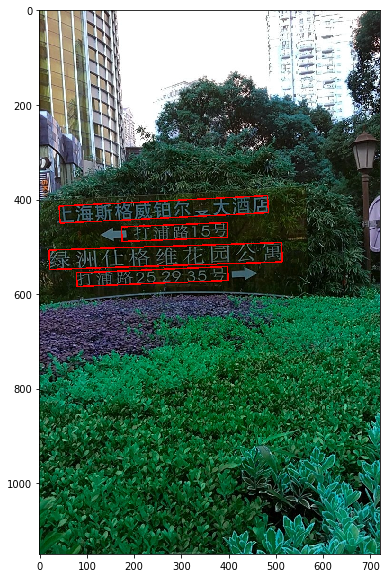

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# 在notebook中使用matplotlib.pyplot绘图时，需要添加该命令进行显示
%matplotlib inline

# 4. 可视化检测结果
image = cv2.imread(img_path)
boxes = [line[0] for line in result]
for box in result:
    box = np.reshape(np.array(box), [-1, 1, 2]).astype(np.int64)
    image = cv2.polylines(np.array(image), [box], True, (255, 0, 0), 2)

# 画出读取的图片
plt.figure(figsize=(10, 10))
plt.imshow(image)


# 2. DB文本检测算法详细实现


## 2.1 DB文本检测算法原理


[DB](https://arxiv.org/pdf/1911.08947.pdf)是一个基于分割的文本检测算法，其提出可微分阈值Differenttiable Binarization module（DB module）采用动态的阈值区分文本区域与背景。


<center><img src="https://ai-studio-static-online.cdn.bcebos.com/5eabdb59916a4267a049e5440f5093a63b6bfac9010844fb971aad0607d455a1" width = "600"></center>
<center><br>图1 DB模型与其他方法的区别</br></center>
<br></br>

基于分割的普通文本检测算法其流程如上图中的蓝色箭头所示，此类方法得到分割结果之后采用一个固定的阈值得到二值化的分割图，之后采用诸如像素聚类的启发式算法得到文本区域。

DB算法的流程如图中红色箭头所示，最大的不同在于DB有一个阈值图，通过网络去预测图片每个位置处的阈值，而不是采用一个固定的值，更好的分离文本背景与前景。

DB算法有以下几个优势：
1. 算法结构简单，无需繁琐的后处理
2. 在开源数据上拥有良好的精度和性能


在传统的图像分割算法中，获取概率图后，会使用标准二值化（Standard Binarize）方法进行处理，将低于阈值的像素点置0，高于阈值的像素点置1，公式如下：
$$ B_{i,j}=\left\{
\begin{aligned}
1 , if P_{i,j} >= t ,\\
0 , otherwise. 
\end{aligned}
\right.
$$
但是标准的二值化方法是不可微的，导致网络无法端对端训练。为了解决这个问题，DB算法提出了可微二值化（Differentiable Binarization，DB）。可微二值化将标准二值化中的阶跃函数进行了近似，使用如下公式进行代替：
$$
\hat{B} = \frac{1}{1 + e^{-k(P_{i,j}-T_{i,j})}}
$$
其中，P是上文中获取的概率图，T是上文中获取的阈值图，k是增益因子，在实验中，根据经验选取为50。标准二值化和可微二值化的对比图如 **下图3（a）** 所示。

当使用交叉熵损失时，正负样本的loss分别为 $l_+$ 和 $l_-$ ：
$$
l_+ = -log(\frac{1}{1 + e^{-k(P_{i,j}-T_{i,j})}})
$$
$$
l_- = -log(1-\frac{1}{1 + e^{-k(P_{i,j}-T_{i,j})}})
$$
对输入 $x$ 求偏导则会得到：
$$
\frac{\delta{l_+}}{\delta{x}} = -kf(x)e^{-kx}
$$
$$
\frac{\delta{l_-}}{\delta{x}} = -kf(x)
$$
可以发现，增强因子会放大错误预测的梯度，从而优化模型得到更好的结果。**图3（b）** 中，$x<0$ 的部分为正样本预测为负样本的情况，可以看到，增益因子k将梯度进行了放大；而 **图3（c）** 中$x>0$ 的部分为负样本预测为正样本时，梯度同样也被放大了。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/29255d870bd74403af37c8f88cb10ebca0c3117282614774a3d607efc8be8c84" width = "600"></center>
<center><br>图3：DB算法示意图</br></center>
<br></br>



DB算法整体结构如下图所示：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/6e1f293e9a1f4c90b6c26919f16b95a4a85dcf7be73f4cc99c9dc5477bb956e6" width = "1000"></center>
<center><br>图2 DB模型网络结构示意图</br></center>
<br></br>

输入的图像经过网络Backbone和FPN提取特征，提取后的特征级联在一起，得到原图四分之一大小的特征，然后利用卷积层分别得到文本区域预测概率图和阈值图，进而通过DB的后处理得到文本包围曲线。


## 2.2 DB文本检测模型构建


DB文本检测模型可以分为三个部分：
- Backbone网络，负责提取图像的特征
- FPN网络，特征金字塔结构增强特征
- Head网络，计算文本区域概率图

本节使用PaddlePaddle分别实现上述三个网络模块，并完成完整的网络构建。


**backbone网络**

DB文本检测网络的Backbone部分采用的是图像分类网络，论文中使用了ResNet50，本节实验中，为了加快训练速度，采用MobileNetV3 large结构作为backbone。


In [ ]:
# 首次运行需要打开下一行的注释，下载PaddleOCR代码
#!git clone https://gitee.com/paddlepaddle/PaddleOCR
import os
# 修改代码运行的默认目录为 /home/aistudio/PaddleOCR
os.chdir("/home/aistudio/PaddleOCR")
# 安装PaddleOCR第三方依赖
!pip install --upgrade pip
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
#  https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/modeling/backbones/det_mobilenet_v3.py
from ppocr.modeling.backbones.det_mobilenet_v3 import MobileNetV3

如果您希望使用ResNet作为Backbone训练，可以在PaddleOCR代码中选择[ResNet](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/modeling/backbones/det_resnet_vd.py)，或者从[PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0/ppcls/modeling/architectures)中选择backbone模型。


DB的Backbone用于提取图像的多尺度特征，如下代码所示，假设输入的形状为[640, 640]，backbone网络的输出有四个特征，其形状分别是 [1, 16, 160, 160]，[1, 24, 80, 80]， [1, 56, 40, 40]，[1, 480, 20, 20]。
这些特征将输入给特征金字塔FPN网络进一步的增强特征。

In [ ]:
import paddle 

fake_inputs = paddle.randn([1, 3, 640, 640], dtype="float32")

# 1. 声明Backbone
model_backbone = MobileNetV3()
model_backbone.eval()

# 2. 执行预测
outs = model_backbone(fake_inputs)

# 3. 打印网络结构
print(model_backbone)

# 4. 打印输出特征形状
for idx, out in enumerate(outs):
    print("The index is ", idx, "and the shape of output is ", out.shape)

MobileNetV3(
  (conv): ConvBNLayer(
    (conv): Conv2D(3, 8, kernel_size=[3, 3], stride=[2, 2], padding=1, data_format=NCHW)
    (bn): BatchNorm()
  )
  (stage0): Sequential(
    (0): ResidualUnit(
      (expand_conv): ConvBNLayer(
        (conv): Conv2D(8, 8, kernel_size=[1, 1], data_format=NCHW)
        (bn): BatchNorm()
      )
      (bottleneck_conv): ConvBNLayer(
        (conv): Conv2D(8, 8, kernel_size=[3, 3], padding=1, groups=8, data_format=NCHW)
        (bn): BatchNorm()
      )
      (linear_conv): ConvBNLayer(
        (conv): Conv2D(8, 8, kernel_size=[1, 1], data_format=NCHW)
        (bn): BatchNorm()
      )
    )
    (1): ResidualUnit(
      (expand_conv): ConvBNLayer(
        (conv): Conv2D(8, 32, kernel_size=[1, 1], data_format=NCHW)
        (bn): BatchNorm()
      )
      (bottleneck_conv): ConvBNLayer(
        (conv): Conv2D(32, 32, kernel_size=[3, 3], stride=[2, 2], padding=1, groups=32, data_format=NCHW)
        (bn): BatchNorm()
      )
      (linear_conv): ConvBNLa

**FPN网络**

特征金字塔结构FPN是一种卷积网络来高效提取图片中各维度特征的常用方法。

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/modeling/necks/db_fpn.py

import paddle
from paddle import nn
import paddle.nn.functional as F
from paddle import ParamAttr

class DBFPN(nn.Layer):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(DBFPN, self).__init__()
        self.out_channels = out_channels

        # DBFPN详细实现参考： https://github.com/PaddlePaddle/PaddleOCRblob/release%2F2.4/ppocr/modeling/necks/db_fpn.py

    def forward(self, x):
        c2, c3, c4, c5 = x

        in5 = self.in5_conv(c5)
        in4 = self.in4_conv(c4)
        in3 = self.in3_conv(c3)
        in2 = self.in2_conv(c2)

        # 特征上采样
        out4 = in4 + F.upsample(
            in5, scale_factor=2, mode="nearest", align_mode=1)  # 1/16
        out3 = in3 + F.upsample(
            out4, scale_factor=2, mode="nearest", align_mode=1)  # 1/8
        out2 = in2 + F.upsample(
            out3, scale_factor=2, mode="nearest", align_mode=1)  # 1/4

        p5 = self.p5_conv(in5)
        p4 = self.p4_conv(out4)
        p3 = self.p3_conv(out3)
        p2 = self.p2_conv(out2)

        # 特征上采样
        p5 = F.upsample(p5, scale_factor=8, mode="nearest", align_mode=1)
        p4 = F.upsample(p4, scale_factor=4, mode="nearest", align_mode=1)
        p3 = F.upsample(p3, scale_factor=2, mode="nearest", align_mode=1)

        fuse = paddle.concat([p5, p4, p3, p2], axis=1)
        return fuse

FPN网络的输入为Backbone部分的输出，输出特征图的高度和宽度为原图的四分之一。假设输入图像的形状为[1, 3, 640, 640]，FPN输出特征的高度和宽度为[160, 160]

In [ ]:

import paddle 

# 1. 从PaddleOCR中import DBFPN
from ppocr.modeling.necks.db_fpn import DBFPN

# 2. 获得Backbone网络输出结果
fake_inputs = paddle.randn([1, 3, 640, 640], dtype="float32")
model_backbone = MobileNetV3()
in_channles = model_backbone.out_channels

# 3. 声明FPN网络
model_fpn = DBFPN(in_channels=in_channles, out_channels=256)

# 4. 打印FPN网络
print(model_fpn)

# 5. 计算得到FPN结果输出
outs = model_backbone(fake_inputs)
fpn_outs = model_fpn(outs)

# 6. 打印FPN输出特征形状
print(f"The shape of fpn outs {fpn_outs.shape}")

DBFPN(
  (in2_conv): Conv2D(16, 256, kernel_size=[1, 1], data_format=NCHW)
  (in3_conv): Conv2D(24, 256, kernel_size=[1, 1], data_format=NCHW)
  (in4_conv): Conv2D(56, 256, kernel_size=[1, 1], data_format=NCHW)
  (in5_conv): Conv2D(480, 256, kernel_size=[1, 1], data_format=NCHW)
  (p5_conv): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (p4_conv): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (p3_conv): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
  (p2_conv): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
)
The shape of fpn outs [1, 256, 160, 160]


**Head网络**

计算文本区域概率图，文本区域阈值图以及文本区域二值图。

In [ ]:
import math
import paddle
from paddle import nn
import paddle.nn.functional as F
from paddle import ParamAttr

class DBHead(nn.Layer):
    """
    Differentiable Binarization (DB) for text detection:
        see https://arxiv.org/abs/1911.08947
    args:
        params(dict): super parameters for build DB network
    """

    def __init__(self, in_channels, k=50, **kwargs):
        super(DBHead, self).__init__()
        self.k = k

        # DBHead详细实现参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/modeling/heads/det_db_head.py

    def step_function(self, x, y):
        # 可微二值化实现，通过概率图和阈值图计算文本分割二值图
        return paddle.reciprocal(1 + paddle.exp(-self.k * (x - y)))

    def forward(self, x, targets=None):
        shrink_maps = self.binarize(x)
        if not self.training:
            return {'maps': shrink_maps}

        threshold_maps = self.thresh(x)
        binary_maps = self.step_function(shrink_maps, threshold_maps)
        y = paddle.concat([shrink_maps, threshold_maps, binary_maps], axis=1)
        return {'maps': y}

DB Head网络会在FPN特征的基础上作上采样，将FPN特征由原图的四分之一大小映射到原图大小。

In [ ]:
# 1. 从PaddleOCR中imort DBHead
from ppocr.modeling.heads.det_db_head import DBHead
import paddle 

# 2. 计算DBFPN网络输出结果
fake_inputs = paddle.randn([1, 3, 640, 640], dtype="float32")
model_backbone = MobileNetV3()
in_channles = model_backbone.out_channels
model_fpn = DBFPN(in_channels=in_channles, out_channels=256)
outs = model_backbone(fake_inputs)
fpn_outs = model_fpn(outs)

# 3. 声明Head网络
model_db_head = DBHead(in_channels=256)

# 4. 打印DBhead网络
print(model_db_head)

# 5. 计算Head网络的输出
db_head_outs = model_db_head(fpn_outs)
print(f"The shape of fpn outs {fpn_outs.shape}")
print(f"The shape of DB head outs {db_head_outs['maps'].shape}")


DBHead(
  (binarize): Head(
    (conv1): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (conv_bn1): BatchNorm()
    (conv2): Conv2DTranspose(64, 64, kernel_size=[2, 2], stride=[2, 2], data_format=NCHW)
    (conv_bn2): BatchNorm()
    (conv3): Conv2DTranspose(64, 1, kernel_size=[2, 2], stride=[2, 2], data_format=NCHW)
  )
  (thresh): Head(
    (conv1): Conv2D(256, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (conv_bn1): BatchNorm()
    (conv2): Conv2DTranspose(64, 64, kernel_size=[2, 2], stride=[2, 2], data_format=NCHW)
    (conv_bn2): BatchNorm()
    (conv3): Conv2DTranspose(64, 1, kernel_size=[2, 2], stride=[2, 2], data_format=NCHW)
  )
)
The shape of fpn outs [1, 256, 160, 160]
The shape of DB head outs [1, 3, 640, 640]


# 3 训练DB文字检测模型
PaddleOCR提供DB文本检测算法，支持MobileNetV3、ResNet50_vd两种骨干网络，可以根据需要选择相应的配置文件，启动训练。

本节以icdar15数据集、MobileNetV3作为骨干网络的DB检测模型（即超轻量模型使用的配置）为例，介绍如何完成PaddleOCR中文字检测模型的训练、评估与测试。

## 3.1 数据准备

本次实验选取了场景文本检测和识别(Scene Text Detection and Recognition)任务最知名和常用的数据集ICDAR2015。icdar2015数据集的示意图如下图所示：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e1b06e0c8e904a2aa412e9eea41f45cce3d58543232948fa88200298fd3cd2e4" width = "600"></center>
<center><br>图 icdar2015数据集示意图 </br></center>
<br></br>

该项目中已经下载了icdar2015数据集，存放在 /home/aistudio/data/data96799 中，可以运行如下指令完成数据集解压，或者从链接中自行下载。

In [ ]:
!cd ~/data/data96799/ && tar xf icdar2015.tar 

运行上述指令后 ~/train_data/icdar2015/text_localization 有两个文件夹和两个文件，分别是：
```
~/train_data/icdar2015/text_localization 
  └─ icdar_c4_train_imgs/         icdar数据集的训练数据
  └─ ch4_test_images/             icdar数据集的测试数据
  └─ train_icdar2015_label.txt    icdar数据集的训练标注
  └─ test_icdar2015_label.txt     icdar数据集的测试标注
```
提供的标注文件格式为：
```
" 图像文件名                    json.dumps编码的图像标注信息"
ch4_test_images/img_61.jpg    [{"transcription": "MASA", "points": [[310, 104], [416, 141], [418, 216], [312, 179]], ...}]
```

json.dumps编码前的图像标注信息是包含多个字典的list，字典中的points表示文本框的四个点的坐标(x, y)，从左上角的点开始顺时针排列。 transcription中的字段表示当前文本框的文字，在文本检测任务中并不需要这个信息。 如果您想在其他数据集上训练PaddleOCR，可以按照上述形式构建标注文件。

如果"transcription"字段的文字为'*'或者'###‘，表示对应的标注可以被忽略掉，因此，如果没有文字标签，可以将transcription字段设置为空字符串。


## 3.2 数据预处理

训练时对输入图片的格式、大小有一定的要求，同时，还需要根据标注信息获取阈值图以及概率图的真实标签。所以，在数据输入模型前，需要对数据进行预处理操作，使得图片和标签满足网络训练和预测的需要。另外，为了扩大训练数据集、抑制过拟合，提升模型的泛化能力，还需要使用了几种基础的数据增广方法。

本实验的数据预处理共包括如下方法：

- 图像解码：将图像转为Numpy格式；
- 标签编码：解析txt文件中的标签信息，并按统一格式进行保存；
- 基础数据增广：包括：随机水平翻转、随机旋转，随机缩放，随机裁剪等；
- 获取阈值图标签：使用扩张的方式获取算法训练需要的阈值图标签；
- 获取概率图标签：使用收缩的方式获取算法训练需要的概率图标签；
- 归一化：通过规范化手段，把神经网络每层中任意神经元的输入值分布改变成均值为0，方差为1的标准正太分布，使得最优解的寻优过程明显会变得平缓，训练过程更容易收敛；
- 通道变换：图像的数据格式为[H, W, C]（即高度、宽度和通道数），而神经网络使用的训练数据的格式为[C, H, W]，因此需要对图像数据重新排列，例如[224, 224, 3]变为[3, 224, 224]；


**图像解码**

In [ ]:
import sys
import six
import cv2
import numpy as np

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/imaug/operators.py
class DecodeImage(object):
    """ decode image """

    def __init__(self, img_mode='RGB', channel_first=False, **kwargs):
        self.img_mode = img_mode
        self.channel_first = channel_first

    def __call__(self, data):
        img = data['image']
        if six.PY2:
            assert type(img) is str and len(
                img) > 0, "invalid input 'img' in DecodeImage"
        else:
            assert type(img) is bytes and len(
                img) > 0, "invalid input 'img' in DecodeImage"
        # 1. 图像解码
        img = np.frombuffer(img, dtype='uint8')
        img = cv2.imdecode(img, 1)

        if img is None:
            return None
        if self.img_mode == 'GRAY':
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        elif self.img_mode == 'RGB':
            assert img.shape[2] == 3, 'invalid shape of image[%s]' % (img.shape)
            img = img[:, :, ::-1]

        if self.channel_first:
            img = img.transpose((2, 0, 1))
        # 2. 解码后的图像放在字典中
        data['image'] = img
        return data

接下来，从训练数据的标注中读取图像，演示DecodeImage类的使用方式。

In [ ]:
import json
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# 在notebook中使用matplotlib.pyplot绘图时，需要添加该命令进行显示
%matplotlib inline
from PIL import Image
import numpy as np


label_path = "/home/aistudio/data/data96799/icdar2015/text_localization/train_icdar2015_label.txt"
img_dir = "/home/aistudio/data/data96799/icdar2015/text_localization/"

# 1. 读取训练标签的第一条数据
f = open(label_path, "r")
lines = f.readlines()

# 2. 取第一条数据
line = lines[0]

print("The first data in train_icdar2015_label.txt is as follows.\n", line)
img_name, gt_label = line.strip().split("\t")

# 3. 读取图像
image = open(os.path.join(img_dir, img_name), 'rb').read()
data = {'image': image, 'label': gt_label}



The first data in train_icdar2015_label.txt is as follows.
 icdar_c4_train_imgs/img_61.jpg	[{"transcription": "###", "points": [[427, 293], [469, 293], [468, 315], [425, 314]]}, {"transcription": "###", "points": [[480, 291], [651, 289], [650, 311], [479, 313]]}, {"transcription": "Ave", "points": [[655, 287], [698, 287], [696, 309], [652, 309]]}, {"transcription": "West", "points": [[701, 285], [759, 285], [759, 308], [701, 308]]}, {"transcription": "YOU", "points": [[1044, 531], [1074, 536], [1076, 585], [1046, 579]]}, {"transcription": "CAN", "points": [[1077, 535], [1114, 539], [1117, 595], [1079, 585]]}, {"transcription": "PAY", "points": [[1119, 539], [1160, 543], [1158, 601], [1120, 593]]}, {"transcription": "LESS?", "points": [[1164, 542], [1252, 545], [1253, 624], [1166, 602]]}, {"transcription": "Singapore's", "points": [[1032, 177], [1185, 73], [1191, 143], [1038, 223]]}, {"transcription": "no.1", "points": [[1190, 73], [1270, 19], [1278, 91], [1194, 133]]}]



声明DecodeImage类，解码图像，并返回一个新的字典data。

The shape of decoded image is  (720, 1280, 3)


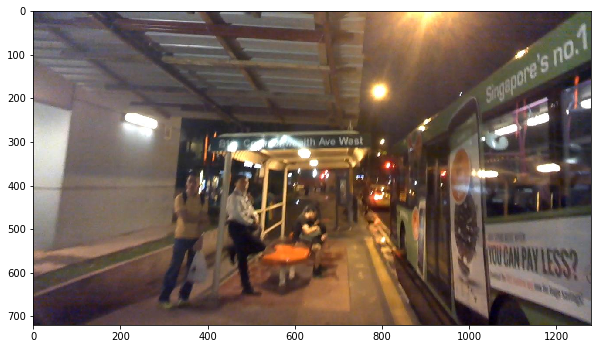

In [ ]:
# 4. 声明DecodeImage类，解码图像
decode_image = DecodeImage(img_mode='RGB', channel_first=False)
data = decode_image(data)

# 5. 打印解码后图像的shape，并可视化图像
print("The shape of decoded image is ", data['image'].shape)

plt.figure(figsize=(10, 10))
plt.imshow(data['image'])
src_img = data['image']

**标签编码**

解析txt文件中的标签信息，并按统一格式进行保存；

In [ ]:
import numpy as np
import string
import json

# 详细实现参考： https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/imaug/label_ops.py#L38
class DetLabelEncode(object):
    def __init__(self, **kwargs):
        pass

    def __call__(self, data):
        label = data['label']
        # 1. 使用json读入标签
        label = json.loads(label)
        nBox = len(label)
        boxes, txts, txt_tags = [], [], []
        for bno in range(0, nBox):
            box = label[bno]['points']
            txt = label[bno]['transcription']
            boxes.append(box)
            txts.append(txt)
            # 1.1 如果文本标注是*或者###，表示此标注无效
            if txt in ['*', '###']:
                txt_tags.append(True)
            else:
                txt_tags.append(False)
        if len(boxes) == 0:
            return None
        boxes = self.expand_points_num(boxes)
        boxes = np.array(boxes, dtype=np.float32)
        txt_tags = np.array(txt_tags, dtype=np.bool)
        
        # 2. 得到文字、box等信息
        data['polys'] = boxes
        data['texts'] = txts
        data['ignore_tags'] = txt_tags
        return data

运行下述代码观察DetLabelEncode类解码标签前后的对比。

In [ ]:
# 从PaddleOCR中import DetLabelEncode
from ppocr.data.imaug.label_ops import DetLabelEncode

# 1. 声明标签解码的类
decode_label = DetLabelEncode()

# 2. 打印解码前的标签
print("The label before decode are: ", data['label'])

# 3. 标签解码
data = decode_label(data)
print("\n")

# 4. 打印解码后的标签
print("The polygon after decode are: ", data['polys'])
print("The text after decode are: ", data['texts'])


The label before decode are:  [{"transcription": "###", "points": [[427, 293], [469, 293], [468, 315], [425, 314]]}, {"transcription": "###", "points": [[480, 291], [651, 289], [650, 311], [479, 313]]}, {"transcription": "Ave", "points": [[655, 287], [698, 287], [696, 309], [652, 309]]}, {"transcription": "West", "points": [[701, 285], [759, 285], [759, 308], [701, 308]]}, {"transcription": "YOU", "points": [[1044, 531], [1074, 536], [1076, 585], [1046, 579]]}, {"transcription": "CAN", "points": [[1077, 535], [1114, 539], [1117, 595], [1079, 585]]}, {"transcription": "PAY", "points": [[1119, 539], [1160, 543], [1158, 601], [1120, 593]]}, {"transcription": "LESS?", "points": [[1164, 542], [1252, 545], [1253, 624], [1166, 602]]}, {"transcription": "Singapore's", "points": [[1032, 177], [1185, 73], [1191, 143], [1038, 223]]}, {"transcription": "no.1", "points": [[1190, 73], [1270, 19], [1278, 91], [1194, 133]]}]


The polygon after decode are:  [[[ 427.  293.]
  [ 469.  293.]
  [ 468.  31

**基础数据增广**

数据增广是提高模型训练精度，增加模型泛化性的常用方法，文本检测常用的数据增广包括随机水平翻转、随机旋转、随机缩放以及随机裁剪等等。

随机水平翻转、随机旋转、随机缩放的代码实现参考[代码](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/imaug/iaa_augment.py)。随机裁剪的数据增广代码实现参考[代码](https://github.com/PaddlePaddle/PaddleOCR/blob/81ee76ad7f9ff534a0ae5439d2a5259c4263993c/ppocr/data/imaug/random_crop_data.py?_pjax=%23js-repo-pjax-container%2C%20div%5Bitemtype%3D%22http%3A%2F%2Fschema.org%2FSoftwareSourceCode%22%5D%20main%2C%20%5Bdata-pjax-container%5D#L127)。


**获取阈值图标签**

使用扩张的方式获取算法训练需要的阈值图标签；


In [ ]:
import numpy as np
import cv2

np.seterr(divide='ignore', invalid='ignore')
import pyclipper
from shapely.geometry import Polygon
import sys
import warnings

warnings.simplefilter("ignore")

# 计算文本区域阈值图标签类
# 详细实现代码参考：https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/imaug/make_border_map.py
class MakeBorderMap(object):
    def __init__(self,
                 shrink_ratio=0.4,
                 thresh_min=0.3,
                 thresh_max=0.7,
                 **kwargs):
        self.shrink_ratio = shrink_ratio
        self.thresh_min = thresh_min
        self.thresh_max = thresh_max

    def __call__(self, data):

        img = data['image']
        text_polys = data['polys']
        ignore_tags = data['ignore_tags']

        # 1. 生成空模版
        canvas = np.zeros(img.shape[:2], dtype=np.float32)
        mask = np.zeros(img.shape[:2], dtype=np.float32)

        for i in range(len(text_polys)):
            if ignore_tags[i]:
                continue

            # 2. draw_border_map函数根据解码后的box信息计算阈值图标签
            self.draw_border_map(text_polys[i], canvas, mask=mask)
        canvas = canvas * (self.thresh_max - self.thresh_min) + self.thresh_min

        data['threshold_map'] = canvas
        data['threshold_mask'] = mask
        return data

    def draw_border_map(self, polygon, canvas, mask):
        polygon = np.array(polygon)
        assert polygon.ndim == 2
        assert polygon.shape[1] == 2

        polygon_shape = Polygon(polygon)
        if polygon_shape.area <= 0:
            return
        # 多边形内缩
        distance = polygon_shape.area * (
            1 - np.power(self.shrink_ratio, 2)) / polygon_shape.length
        subject = [tuple(l) for l in polygon]
        padding = pyclipper.PyclipperOffset()
        padding.AddPath(subject, pyclipper.JT_ROUND, pyclipper.ET_CLOSEDPOLYGON)
        # 计算mask
        padded_polygon = np.array(padding.Execute(distance)[0])
        cv2.fillPoly(mask, [padded_polygon.astype(np.int32)], 1.0)

        xmin = padded_polygon[:, 0].min()
        xmax = padded_polygon[:, 0].max()
        ymin = padded_polygon[:, 1].min()
        ymax = padded_polygon[:, 1].max()
        width = xmax - xmin + 1
        height = ymax - ymin + 1

        polygon[:, 0] = polygon[:, 0] - xmin
        polygon[:, 1] = polygon[:, 1] - ymin

        xs = np.broadcast_to(
            np.linspace(
                0, width - 1, num=width).reshape(1, width), (height, width))
        ys = np.broadcast_to(
            np.linspace(
                0, height - 1, num=height).reshape(height, 1), (height, width))

        distance_map = np.zeros(
            (polygon.shape[0], height, width), dtype=np.float32)
        for i in range(polygon.shape[0]):
            j = (i + 1) % polygon.shape[0]
            # 计算点到线的距离
            absolute_distance = self._distance(xs, ys, polygon[i], polygon[j])
            distance_map[i] = np.clip(absolute_distance / distance, 0, 1)
        distance_map = distance_map.min(axis=0)

        xmin_valid = min(max(0, xmin), canvas.shape[1] - 1)
        xmax_valid = min(max(0, xmax), canvas.shape[1] - 1)
        ymin_valid = min(max(0, ymin), canvas.shape[0] - 1)
        ymax_valid = min(max(0, ymax), canvas.shape[0] - 1)
        canvas[ymin_valid:ymax_valid + 1, xmin_valid:xmax_valid + 1] = np.fmax(
            1 - distance_map[ymin_valid - ymin:ymax_valid - ymax + height,
                             xmin_valid - xmin:xmax_valid - xmax + width],
            canvas[ymin_valid:ymax_valid + 1, xmin_valid:xmax_valid + 1])

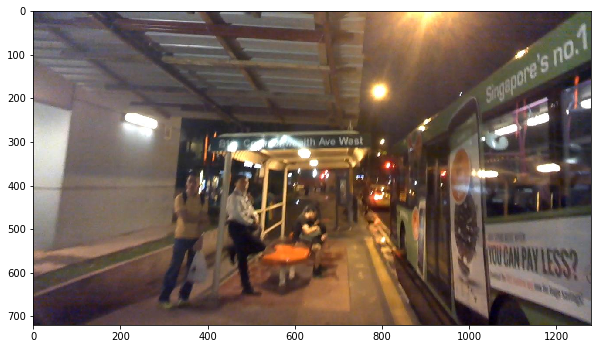

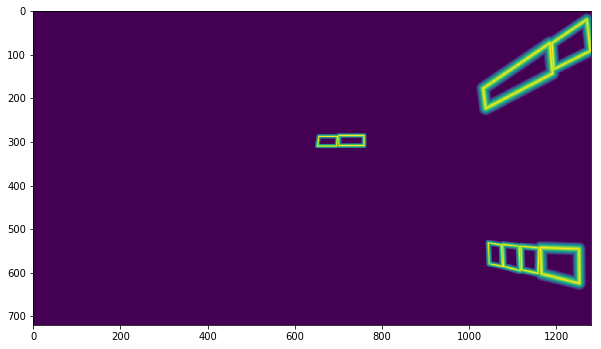

In [ ]:
# 从PaddleOCR中import MakeBorderMap
from ppocr.data.imaug.make_border_map import MakeBorderMap

# 1. 声明MakeBorderMap函数
generate_text_border = MakeBorderMap()

# 2. 根据解码后的输入数据计算bordermap信息
data = generate_text_border(data)

# 3. 阈值图可视化
plt.figure(figsize=(10, 10))
plt.imshow(src_img)

text_border_map = data['threshold_map']
plt.figure(figsize=(10, 10))
plt.imshow(text_border_map)


**获取概率图标签**

使用收缩的方式获取算法训练需要的概率图标签；


In [ ]:

import numpy as np
import cv2
from shapely.geometry import Polygon
import pyclipper

# 计算概率图标签
# 详细代码实现参考： https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/imaug/make_shrink_map.py
class MakeShrinkMap(object):
    r'''
    Making binary mask from detection data with ICDAR format.
    Typically following the process of class `MakeICDARData`.
    '''

    def __init__(self, min_text_size=8, shrink_ratio=0.4, **kwargs):
        self.min_text_size = min_text_size
        self.shrink_ratio = shrink_ratio

    def __call__(self, data):
        image = data['image']
        text_polys = data['polys']
        ignore_tags = data['ignore_tags']

        h, w = image.shape[:2]
        # 1. 校验文本检测标签
        text_polys, ignore_tags = self.validate_polygons(text_polys,
                                                         ignore_tags, h, w)
        gt = np.zeros((h, w), dtype=np.float32)
        mask = np.ones((h, w), dtype=np.float32)

        # 2. 根据文本检测框计算文本区域概率图
        for i in range(len(text_polys)):
            polygon = text_polys[i]
            height = max(polygon[:, 1]) - min(polygon[:, 1])
            width = max(polygon[:, 0]) - min(polygon[:, 0])
            if ignore_tags[i] or min(height, width) < self.min_text_size:
                cv2.fillPoly(mask,
                             polygon.astype(np.int32)[np.newaxis, :, :], 0)
                ignore_tags[i] = True
            else:
                # 多边形内缩
                polygon_shape = Polygon(polygon)
                subject = [tuple(l) for l in polygon]
                padding = pyclipper.PyclipperOffset()
                padding.AddPath(subject, pyclipper.JT_ROUND,
                                pyclipper.ET_CLOSEDPOLYGON)
                shrinked = []

                # Increase the shrink ratio every time we get multiple polygon returned back
                possible_ratios = np.arange(self.shrink_ratio, 1,
                                            self.shrink_ratio)
                np.append(possible_ratios, 1)
                # print(possible_ratios)
                for ratio in possible_ratios:
                    # print(f"Change shrink ratio to {ratio}")
                    distance = polygon_shape.area * (
                        1 - np.power(ratio, 2)) / polygon_shape.length
                    shrinked = padding.Execute(-distance)
                    if len(shrinked) == 1:
                        break

                if shrinked == []:
                    cv2.fillPoly(mask,
                                 polygon.astype(np.int32)[np.newaxis, :, :], 0)
                    ignore_tags[i] = True
                    continue
                # 填充
                for each_shrink in shrinked:
                    shrink = np.array(each_shrink).reshape(-1, 2)
                    cv2.fillPoly(gt, [shrink.astype(np.int32)], 1)

        data['shrink_map'] = gt
        data['shrink_mask'] = mask
        return data

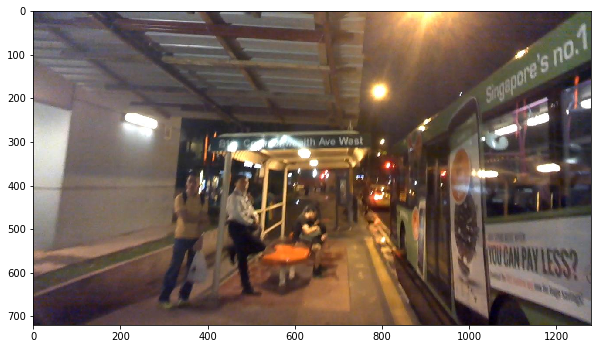

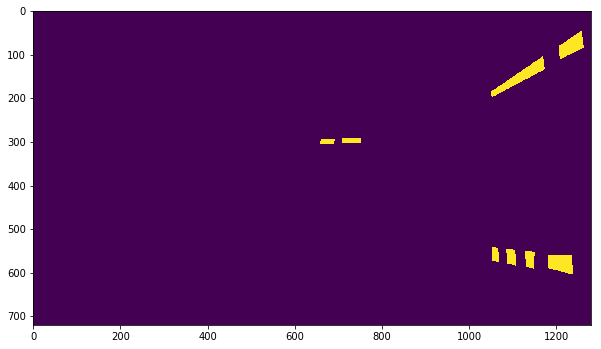

In [ ]:
# 从 PaddleOCR 中 import MakeShrinkMap
from ppocr.data.imaug.make_shrink_map import MakeShrinkMap

# 1. 声明文本概率图标签生成
generate_shrink_map = MakeShrinkMap()

# 2. 根据解码后的标签计算文本区域概率图
data = generate_shrink_map(data)

# 3. 文本区域概率图可视化
plt.figure(figsize=(10, 10))
plt.imshow(src_img)
text_border_map = data['shrink_map']
plt.figure(figsize=(10, 10))
plt.imshow(text_border_map)

**归一化**

通过规范化手段，把神经网络每层中任意神经元的输入值分布改变成均值为0，方差为1的标准正太分布，使得最优解的寻优过程明显会变得平缓，训练过程更容易收敛；


In [ ]:
# 图像归一化类
class NormalizeImage(object):
    """ normalize image such as substract mean, divide std
    """

    def __init__(self, scale=None, mean=None, std=None, order='chw', **kwargs):
        if isinstance(scale, str):
            scale = eval(scale)
        self.scale = np.float32(scale if scale is not None else 1.0 / 255.0)
        # 1. 获得归一化的均值和方差
        mean = mean if mean is not None else [0.485, 0.456, 0.406]
        std = std if std is not None else [0.229, 0.224, 0.225]

        shape = (3, 1, 1) if order == 'chw' else (1, 1, 3)
        self.mean = np.array(mean).reshape(shape).astype('float32')
        self.std = np.array(std).reshape(shape).astype('float32')

    def __call__(self, data):
        # 2. 从字典中获取图像数据
        img = data['image']
        from PIL import Image
        if isinstance(img, Image.Image):
            img = np.array(img)
        assert isinstance(img, np.ndarray), "invalid input 'img' in NormalizeImage"

        # 3. 图像归一化
        data['image'] = (img.astype('float32') * self.scale - self.mean) / self.std
        return data



**通道变换**

图像的数据格式为[H, W, C]（即高度、宽度和通道数），而神经网络使用的训练数据的格式为[C, H, W]，因此需要对图像数据重新排列，例如[224, 224, 3]变为[3, 224, 224]；


In [ ]:
# 改变图像的通道顺序，HWC to CHW
class ToCHWImage(object):
    """ convert hwc image to chw image
    """
    def __init__(self, **kwargs):
        pass

    def __call__(self, data):
        # 1. 从字典中获取图像数据
        img = data['image']
        from PIL import Image
        if isinstance(img, Image.Image):
            img = np.array(img)
        
        # 2. 通过转置改变图像的通道顺序
        data['image'] = img.transpose((2, 0, 1))
        return data
    
# 1. 声明通道变换类
transpose = ToCHWImage()

# 2. 打印变换前的图像
print("The shape of image before transpose", data['image'].shape)

# 3. 图像通道变换
data = transpose(data)

# 4. 打印通向通道变换后的图像
print("The shape of image after transpose", data['image'].shape)

The shape of image before transpose (720, 1280, 3)
The shape of image after transpose (3, 720, 1280)


## 3.3 构建数据读取器


上面的代码仅展示了读取一张图片和预处理的方法，在实际模型训练时，多采用批量数据读取处理的方式。

本节采用PaddlePaddle中的[Dataset](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/Dataset_cn.html)和[DatasetLoader](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/DataLoader_cn.html#dataloader) API构建数据读取器。

In [ ]:
# dataloader构建详细代码参考：https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/data/simple_dataset.py

import numpy as np
import os
import random
from paddle.io import Dataset

def transform(data, ops=None):
    """ transform """
    if ops is None:
        ops = []
    for op in ops:
        data = op(data)
        if data is None:
            return None
    return data


def create_operators(op_param_list, global_config=None):
    """
    create operators based on the config
    Args:
        params(list): a dict list, used to create some operators
    """
    assert isinstance(op_param_list, list), ('operator config should be a list')
    ops = []
    for operator in op_param_list:
        assert isinstance(operator,
                          dict) and len(operator) == 1, "yaml format error"
        op_name = list(operator)[0]
        param = {} if operator[op_name] is None else operator[op_name]
        if global_config is not None:
            param.update(global_config)
        op = eval(op_name)(**param)
        ops.append(op)
    return ops

    
class SimpleDataSet(Dataset):
    def __init__(self, mode, label_file, data_dir, seed=None):
        super(SimpleDataSet, self).__init__()
        # 标注文件中，使用'\t'作为分隔符区分图片名称与标签
        self.delimiter = '\t'
        # 数据集路径
        self.data_dir = data_dir
        # 随机数种子
        self.seed = seed
        # 获取所有数据，以列表形式返回
        self.data_lines = self.get_image_info_list(label_file)
        # 新建列表存放数据索引
        self.data_idx_order_list = list(range(len(self.data_lines)))
        self.mode = mode
        # 如果是训练过程，将数据集进行随机打乱
        if self.mode.lower() == "train":
            self.shuffle_data_random()

    def get_image_info_list(self, label_file):
        # 获取标签文件中的所有数据
        with open(label_file, "rb") as f:
            lines = f.readlines()
        return lines

    def shuffle_data_random(self):
        #随机打乱数据
        random.seed(self.seed)
        random.shuffle(self.data_lines)
        return

    def __getitem__(self, idx):
        # 1. 获取索引为idx的数据
        file_idx = self.data_idx_order_list[idx]
        data_line = self.data_lines[file_idx]
        try:
            # 2. 获取图片名称以及标签
            data_line = data_line.decode('utf-8')
            substr = data_line.strip("\n").split(self.delimiter)
            file_name = substr[0]
            label = substr[1]
            # 3. 获取图片路径
            img_path = os.path.join(self.data_dir, file_name)
            data = {'img_path': img_path, 'label': label}
            if not os.path.exists(img_path):
                raise Exception("{} does not exist!".format(img_path))
            # 4. 读取图片并进行预处理
            with open(data['img_path'], 'rb') as f:
                img = f.read()
                data['image'] = img

            # 5. 完成数据增强操作
            outs = transform(data, self.mode.lower())

        # 6. 如果当前数据读取失败，重新随机读取一个新数据
        except Exception as e:
            outs = None
        if outs is None:
            return self.__getitem__(np.random.randint(self.__len__()))
        return outs

    def __len__(self):
        # 返回数据集的大小
        return len(self.data_idx_order_list)

PaddlePaddle的[Dataloader API](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/DataLoader_cn.html#dataloader)中可以使用多进程数据读取，并可以自由设置线程数量。多线程数据读取可以加快数据处理速度和模型训练速度，多线程读取实现代码如下：

In [ ]:

from paddle.io import Dataset, DataLoader, BatchSampler, DistributedBatchSampler

def build_dataloader(mode, label_file, data_dir, batch_size, drop_last, shuffle, num_workers, seed=None):
    # 创建数据读取类
    dataset = SimpleDataSet(mode, label_file, data_dir, seed)
    # 定义 batch_sampler
    batch_sampler = BatchSampler(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)
    # 使用paddle.io.DataLoader创建数据读取器，并设置batchsize，进程数量num_workers等参数
    data_loader = DataLoader(dataset=dataset, batch_sampler=batch_sampler, num_workers=num_workers, return_list=True, use_shared_memory=False)

    return data_loader


In [ ]:
ic15_data_path = "/home/aistudio/data/data96799/icdar2015/text_localization/"
train_data_label = "/home/aistudio/data/data96799/icdar2015/text_localization/train_icdar2015_label.txt"
eval_data_label = "/home/aistudio/data/data96799/icdar2015/text_localization/test_icdar2015_label.txt"

# 定义训练集数据读取器，进程数设置为8
train_dataloader = build_dataloader('Train', train_data_label, ic15_data_path, batch_size=8, drop_last=False, shuffle=True, num_workers=0)
# 定义验证集数据读取器
eval_dataloader = build_dataloader('Eval', eval_data_label, ic15_data_path, batch_size=1, drop_last=False, shuffle=False, num_workers=0)


## 3.4  DB模型后处理

DB head网络的输出形状和原图相同，实际上DB head网络输出的三个通道特征分别为文本区域的概率图、阈值图和二值图。

在训练阶段，3个预测图与真实标签共同完成损失函数的计算以及模型训练；

在预测阶段，只需要使用概率图即可，DB后处理函数根据概率图中文本区域的响应计算出包围文本响应区域的文本框坐标。

由于网络预测的概率图是经过收缩后的结果，所以在后处理步骤中，使用相同的偏移值将预测的多边形区域进行扩张，即可得到最终的文本框。代码实现如下所示。

In [ ]:
# https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/postprocess/db_postprocess.py

import numpy as np
import cv2
import paddle
from shapely.geometry import Polygon
import pyclipper


class DBPostProcess(object):
    """
    The post process for Differentiable Binarization (DB).
    """

    def __init__(self,
                 thresh=0.3,
                 box_thresh=0.7,
                 max_candidates=1000,
                 unclip_ratio=2.0,
                 use_dilation=False,
                 score_mode="fast",
                 **kwargs):
        # 1. 获取后处理超参数
        self.thresh = thresh
        self.box_thresh = box_thresh
        self.max_candidates = max_candidates
        self.unclip_ratio = unclip_ratio
        self.min_size = 3
        self.score_mode = score_mode
        assert score_mode in [
            "slow", "fast"
        ], "Score mode must be in [slow, fast] but got: {}".format(score_mode)

        self.dilation_kernel = None if not use_dilation else np.array(
            [[1, 1], [1, 1]])

        # DB后处理代码详细实现参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/postprocess/db_postprocess.py

    def __call__(self, outs_dict, shape_list):

        # 1. 从字典中获取网络预测结果
        pred = outs_dict['maps']
        if isinstance(pred, paddle.Tensor):
            pred = pred.numpy()
        pred = pred[:, 0, :, :]

        # 2. 大于后处理参数阈值self.thresh的
        segmentation = pred > self.thresh

        boxes_batch = []
        for batch_index in range(pred.shape[0]):
            # 3. 获取原图的形状和resize比例
            src_h, src_w, ratio_h, ratio_w = shape_list[batch_index]
            if self.dilation_kernel is not None:
                mask = cv2.dilate(
                    np.array(segmentation[batch_index]).astype(np.uint8),
                    self.dilation_kernel)
            else:
                mask = segmentation[batch_index]
             
            # 4. 使用boxes_from_bitmap函数 完成 从预测的文本概率图中计算得到文本框
            boxes, scores = self.boxes_from_bitmap(pred[batch_index], mask,
                                                   src_w, src_h)

            boxes_batch.append({'points': boxes})
        return boxes_batch



可以发现每个单词都有一个蓝色的框包围着。这些蓝色的框即是在DB输出的分割结果上做一些后处理得到的。将如下代码添加到PaddleOCR/ppocr/postprocess/db_postprocess.py的177行，可以可视化DB输出的分割图，分割图的可视化结果保存为图像vis_segmentation.png。

```
_maps = np.array(pred[0, :, :] * 255).astype(np.uint8)
import cv2
cv2.imwrite("vis_segmentation.png", _maps)
```

In [ ]:
# 1. 下载训练好的模型
!wget -nc -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_mv3_db_v2.0_train.tar
!cd ./pretrain_models/ && tar xf det_mv3_db_v2.0_train.tar && cd ../

# 2. 执行文本检测预测得到结果
!python tools/infer_det.py -c configs/det/det_mv3_db.yml \
                           -o Global.checkpoints=./pretrain_models/det_mv3_db_v2.0_train/best_accuracy \
                              Global.infer_img=./doc/imgs_en/img_12.jpg 
                              #PostProcess.unclip_ratio=4.0
# 注：有关PostProcess参数和Global参数介绍与使用参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.3/doc/doc_ch/config.md

File ‘./pretrain_models/det_mv3_db_v2.0_train.tar’ already there; not retrieving.

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details

可视化预测模型预测的文本概率图，以及最终预测文本框结果。

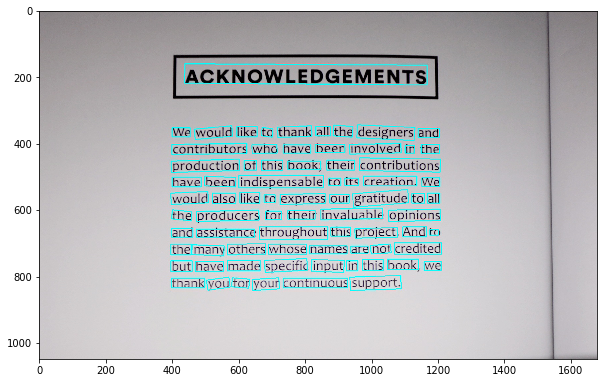

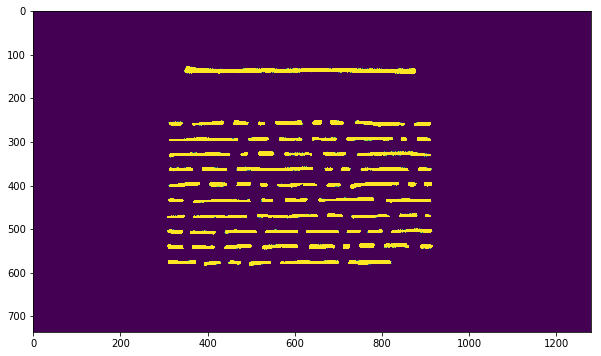

In [ ]:
img = Image.open('./output/det_db/det_results/img_12.jpg')
img = np.array(img)

# 画出读取的图片
plt.figure(figsize=(10, 10))
plt.imshow(img)

img = Image.open('./vis_segmentation.png')
img = np.array(img)

# 画出读取的图片
plt.figure(figsize=(10, 10))
plt.imshow(img)

从可视化结果中可以发现DB的输出结果是文本区域的二值图，属于文本区域的响应更高，非文本的背景区域响应值低。DB的后处理即是求这些响应区域的最小包围框，进而得到每个文本区域的坐标。
另外，通过修改后处理参数可以调整文本框的大小，或者过滤检测效果差的文本框。

DB后处理有四个参数，分别是：
- thresh: DBPostProcess中分割图进行二值化的阈值，默认值为0.3
- box_thresh: DBPostProcess中对输出框进行过滤的阈值，低于此阈值的框不会输出
- unclip_ratio: DBPostProcess中对文本框进行放大的比例
- max_candidates: DBPostProcess中输出的最大文本框数量，默认1000


In [ ]:

# 3. 增大DB后处理的参数unlip_ratio为4.0，默认为1.5，改变输出的文本框大小，参数执行文本检测预测得到结果
!python tools/infer_det.py -c configs/det/det_mv3_db.yml \
                           -o Global.checkpoints=./pretrain_models/det_mv3_db_v2.0_train/best_accuracy \
                              Global.infer_img=./doc/imgs_en/img_12.jpg \
                              PostProcess.unclip_ratio=4.0
# 注：有关PostProcess参数和Global参数介绍与使用参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/doc/doc_ch/config.md

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

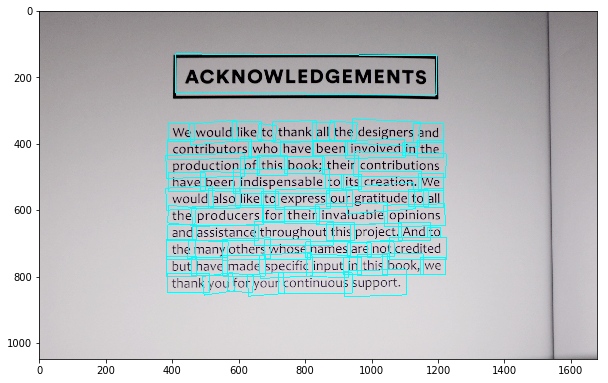

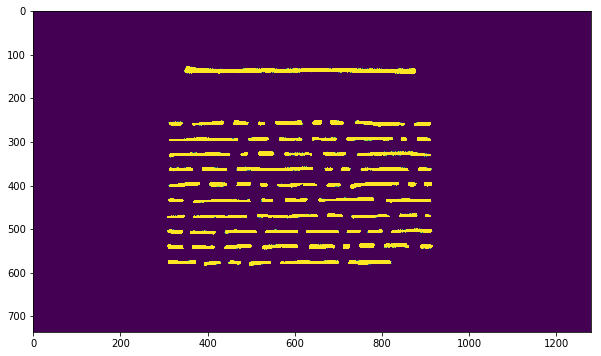

In [ ]:
img = Image.open('./output/det_db/det_results/img_12.jpg')
img = np.array(img)

# 画出读取的图片
plt.figure(figsize=(10, 10))
plt.imshow(img)

img = Image.open('./vis_segmentation.png')
img = np.array(img)

# 画出读取的图片
plt.figure(figsize=(10, 10))
plt.imshow(img)

从上述代码的运行结果可以发现，增大DB后处理的unclip_ratio参数之后，预测的文本框明显变大了。因此，当训练结果不符合我们预期时，可以通过调整后处理参数调整文本检测结果。另外，可以尝试调整其他三个参数thresh，box_thresh，max_candidates对比检测结果。

## 3.5 损失函数定义


由于训练阶段获取了3个预测图，所以在损失函数中，也需要结合这3个预测图与它们对应的真实标签分别构建3部分损失函数。总的损失函数的公式定义如下:

$L = L_b + \alpha \times L_s + \beta \times L_t$

其中，$L$为总的损失，$L_s$为概率图损失，在本实验中使用了带 OHEM（online hard example mining） 的 Dice 损失，$L_t$为阈值图损失，在本实验中使用了预测值和标签间的$L_1$距离，$L_b$为文本二值图的损失函数。$\alpha$和$\beta$为权重系数，本实验中分别将其设为5和10。

三个loss $L_b$，$L_s$，$L_t$分别是Dice Loss、Dice Loss(OHEM)、MaskL1 Loss，接下来分别定义这3个部分：

- Dice Loss是比较预测的文本二值图和标签之间的相似度，常用于二值图像分割，代码实现参考[链接](https://github.com/PaddlePaddle/PaddleOCR/blob/81ee76ad7f9ff534a0ae5439d2a5259c4263993c/ppocr/losses/det_basic_loss.py?_pjax=%23js-repo-pjax-container%2C%20div%5Bitemtype%3D%22http%3A%2F%2Fschema.org%2FSoftwareSourceCode%22%5D%20main%2C%20%5Bdata-pjax-container%5D#L109)。公式如下：

$dice\_loss = 1 - \frac{2 \times intersection\_area}{total\_area}$

- Dice Loss(OHEM)是采用带OHEM的Dice Loss，目的是为了改善正负样本不均衡的问题。OHEM为一种特殊的自动采样方式，可以自动的选择难样本进行loss的计算，从而提升模型的训练效果。这里将正负样本的采样比率设为1:3。代码实现参考[链接](https://github.com/PaddlePaddle/PaddleOCR/blob/81ee76ad7f9ff534a0ae5439d2a5259c4263993c/ppocr/losses/det_basic_loss.py?_pjax=%23js-repo-pjax-container%2C%20div%5Bitemtype%3D%22http%3A%2F%2Fschema.org%2FSoftwareSourceCode%22%5D%20main%2C%20%5Bdata-pjax-container%5D#L95)。

- MaskL1 Loss是计算预测的文本阈值图和标签间的$L_1$距离。

In [ ]:

from paddle import nn
import paddle
from paddle import nn
import paddle.nn.functional as F


# DB损失函数
# 详细代码实现参考：https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/losses/det_db_loss.py
class DBLoss(nn.Layer):
    """
    Differentiable Binarization (DB) Loss Function
    args:
        param (dict): the super paramter for DB Loss
    """

    def __init__(self,
                 balance_loss=True,
                 main_loss_type='DiceLoss',
                 alpha=5,
                 beta=10,
                 ohem_ratio=3,
                 eps=1e-6,
                 **kwargs):
        super(DBLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        # 声明不同的损失函数
        self.dice_loss = DiceLoss(eps=eps)
        self.l1_loss = MaskL1Loss(eps=eps)
        self.bce_loss = BalanceLoss(
            balance_loss=balance_loss,
            main_loss_type=main_loss_type,
            negative_ratio=ohem_ratio)

    def forward(self, predicts, labels):
        predict_maps = predicts['maps']
        label_threshold_map, label_threshold_mask, label_shrink_map, label_shrink_mask = labels[
            1:]
        shrink_maps = predict_maps[:, 0, :, :]
        threshold_maps = predict_maps[:, 1, :, :]
        binary_maps = predict_maps[:, 2, :, :]
        # 1. 针对文本预测概率图，使用二值交叉熵损失函数
        loss_shrink_maps = self.bce_loss(shrink_maps, label_shrink_map,
                                         label_shrink_mask)
        # 2. 针对文本预测阈值图使用L1距离损失函数
        loss_threshold_maps = self.l1_loss(threshold_maps, label_threshold_map,
                                           label_threshold_mask)
        # 3. 针对文本预测二值图，使用dice loss损失函数
        loss_binary_maps = self.dice_loss(binary_maps, label_shrink_map,
                                          label_shrink_mask)

        # 4. 不同的损失函数乘上不同的权重
        loss_shrink_maps = self.alpha * loss_shrink_maps
        loss_threshold_maps = self.beta * loss_threshold_maps

        loss_all = loss_shrink_maps + loss_threshold_maps \
                   + loss_binary_maps
        losses = {'loss': loss_all, \
                  "loss_shrink_maps": loss_shrink_maps, \
                  "loss_threshold_maps": loss_threshold_maps, \
                  "loss_binary_maps": loss_binary_maps}
        return losses

## 3.6 评估指标

考虑到DB后处理检测框多种多样，并不是水平的，本次试验中采用简单计算IOU的方式来评测，计算代码参考[icdar Challenges 4的文本检测评测方法](https://rrc.cvc.uab.es/?ch=4&com=mymethods&task=1)。


文本检测的计算指标有三个，分别是Precision，Recall和Hmean，三个指标的计算逻辑为：
1. 创建[n, m]大小的一个矩阵叫做iouMat，其中n为GT(ground truth)box的个数，m为检测到的框数量；其中n,m为除去了文本标定为###的框数量；
2. 在iouMat中，统计IOU大于阈值0.5的个数，将这个值除以gt个数n得到Recall；
3. 在iouMat中，统计IOU大于阈值0.5的个数，将这个值除以检测框m的个数得到Precision；
4. Hmean的指标计算方式同F1-score的计算方式，公式如下：

$$
Hmean = 2.0* \frac{Precision * Recall}{Precision + Recall }
$$


文本检测metric指标计算的核心代码如下所示，完整代码实现参考[链接](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/metrics/det_metric.py)：

In [ ]:
# 文本检测metric指标计算方式如下：
# 完整代码参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/ppocr/metrics/det_metric.py
if len(gtPols) > 0 and len(detPols) > 0:
    outputShape = [len(gtPols), len(detPols)]

    # 1. 创建[n, m]大小的矩阵，用于保存计算的IOU
    iouMat = np.empty(outputShape)
    gtRectMat = np.zeros(len(gtPols), np.int8)
    detRectMat = np.zeros(len(detPols), np.int8)
    for gtNum in range(len(gtPols)):
        for detNum in range(len(detPols)):
            pG = gtPols[gtNum]
            pD = detPols[detNum]

            # 2. 计算预测框和GT框之间的IOU
            iouMat[gtNum, detNum] = get_intersection_over_union(pD, pG)
    for gtNum in range(len(gtPols)):
        for detNum in range(len(detPols)):
            if gtRectMat[gtNum] == 0 and detRectMat[
                    detNum] == 0 and gtNum not in gtDontCarePolsNum and detNum not in detDontCarePolsNum:

                # 2.1 统计IOU大于阈值0.5的个数
                if iouMat[gtNum, detNum] > self.iou_constraint:
                    gtRectMat[gtNum] = 1
                    detRectMat[detNum] = 1
                    detMatched += 1
                    pairs.append({'gt': gtNum, 'det': detNum})
                    detMatchedNums.append(detNum)
    
    # 3. IOU大于阈值0.5的个数除以GT框的个数numGtcare得到recall
    recall = float(detMatched) / numGtCare

    # 4. IOU大于阈值0.5的个数除以预测框的个数numDetcare得到precision
    precision = 0 if numDetCare == 0 else float(detMatched) / numDetCare

    # 5. 通过公式计算得到Hmean指标
    hmean = 0 if (precision + recall) == 0 else 2.0 * \
                                                    precision * recall / (precision + recall)
    

**思考：**
1. 对于下图中的情况，当GT框与预测框的IOU大于0.5，但是却漏检测文本的情况，上述指标计算是否能准确反映模型的精度？
2. 实验场景中遇到此类问题，该如何优化模型？

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e23f47c7c39f4b92bb494444d3724758401cd9810a8d469690093857c7f05d9e" width = "600"></center>
<center><br>图 GT框与预测框的标注示例 </br></center>
<br></br>




## 3.7 模型训练

完成数据处理，网络定义和损失函数定义后即可开始训练模型了。

训练基于PaddleOCR训练，采用参数配置的形式，参数文件参考[链接](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.4/configs/det/det_mv3_db.yml)，网络结构参数如下：
```
Architecture:
  model_type: det
  algorithm: DB
  Transform:
  Backbone:
    name: MobileNetV3
    scale: 0.5
    model_name: large
  Neck:
    name: DBFPN
    out_channels: 256
  Head:
    name: DBHead
    k: 50
```

优化器参数如下：
```
Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    learning_rate: 0.001
  regularizer:
    name: 'L2'
    factor: 0
```

后处理参数如下：
```
PostProcess:
  name: DBPostProcess
  thresh: 0.3
  box_thresh: 0.6
  max_candidates: 1000
  unclip_ratio: 1.5
```

...

完整参数配置文件见[det_mv3_db.yml](https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.3/configs/det/det_mv3_db.yml)


In [ ]:
!mkdir train_data 
!cd train_data && ln -s /home/aistudio/data/data96799/icdar2015  icdar2015
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams

mkdir: cannot create directory ‘train_data’: File exists
--2021-12-22 22:04:50--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 100.67.200.6
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|100.67.200.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16255295 (16M) [application/octet-stream]
Saving to: ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams.3’

MobileNetV3_large_x 100%[===================>]  15.50M  70.9MB/s    in 0.2s    

2021-12-22 22:04:50 (70.9 MB/s) - ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams.3’ saved [16255295/16255295]



In [67]:
!python tools/train.py -c configs/det/det_mv3_db.yml

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

网络训练后的模型默认保存在PaddleOCR/output/db_mv3/目录下，如果想更换保存目录可以在训练时设置参数Global.save_model_dir，比如：
```
# 设置参数文件里的Global.save_model_dir可以更改模型保存目录
python tools/train.py -c configs/det/det_mv3_db.yml -o Global.save_model_dir="./output/save_db_train/"
```



## 3.8 模型评估

训练过程中，默认保存两种模型，一种是latest命名的最新训练的模型，一种是best_accuracy命名的精度最高的模型。接下来使用保存的模型参数评估在测试集上的precision、recall和hmean：

文本检测精度评估代码位于PaddleOCR/ppocr/metrics/det_metric.py中，调用tools/eval.py即可进行对训练好的模型做精度评估。

In [ ]:
!python tools/eval.py -c configs/det/det_mv3_db.yml -o Global.checkpoints=./output/db_mv3/best_accuracy

## 3.9 模型预测

训练好模型后，也可以使用保存好的模型，对数据集中的某一张图片或者某个文件夹的图像进行模型推理，观察模型预测效果。



In [68]:
!python tools/infer_det.py -c configs/det/det_mv3_db.yml -o Global.checkpoints=./pretrain_models/det_mv3_db_v2.0_train/best_accuracy Global.infer_img=./doc/imgs_en/img_12.jpg

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

预测后的图像默认保存在./output/det_db/det_results/目录下，使用PIL库可视化结果如下：

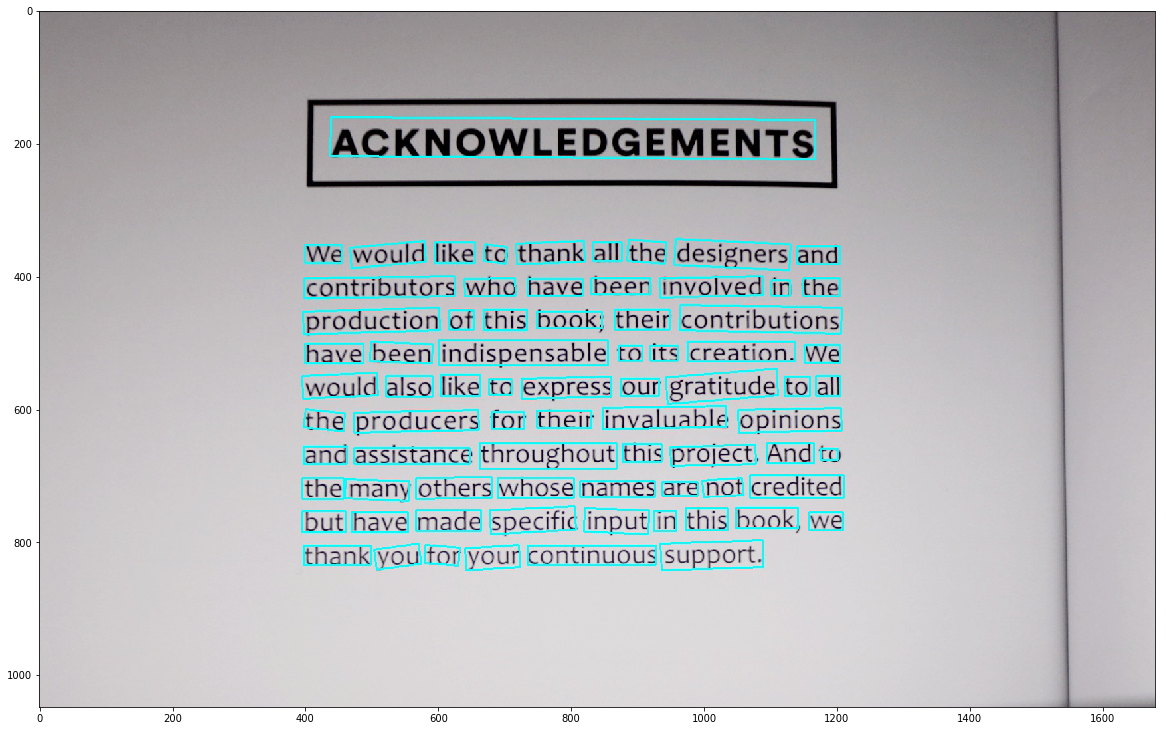

In [69]:
import matplotlib.pyplot as plt
# 在notebook中使用matplotlib.pyplot绘图时，需要添加该命令进行显示
%matplotlib inline
from PIL import Image
import numpy as np

img = Image.open('./output/det_db/det_results/img_12.jpg')
img = np.array(img)

# 画出读取的图片
plt.figure(figsize=(20, 20))
plt.imshow(img)

# 4. 总结

本节介绍了PaddleOCR文本检测模型的快速使用方法，并且以DB算法为例，介绍了从数据处理到完成文本检测算法训练的实现过程。下一节将介绍文本识别算法的相关内容。

# **FAQ**

1. 遇到如下图文字漏检测部分，该如何处理？

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/ccf08d89e0974a848e1a929eefbc1e7176ba211121cb4b76a6b6501cb27b1c9f" width = "500"></center>

<center><br>图 文字区域漏检测 </br></center>
<br></br>

上述问题表现检测了一部分文字，但是文本预测框和GT框的IOU大于阈值0.5，检测指标无法正常反馈出来，如果此类结果较多，建议增大IOU阈值。另外，漏检测的本质原因在于，一部分文字的特征没有响应，归根结底是网络没有学习到漏检测部分文字的特征。建议具体问题具体分析，可视化预测结果分析漏检测的原因，是否是因为光照，形变，文字较长等因素导致的，然后针对性的使用数据增强、调整网络、或者调整后处理等方法优化检测结果。


更多文本检测FAQ内容，参考下一节内容。

# 作业
简答题：
- 1. 根据DB Backbone和FPN的输出特征图的大小，判断DB的输入图像高度和宽度需要是_的倍数？
A: 32， B: 64

实验题：
- 1. 使用DB算法配置文件configs/det/det_mv3_db.yml在数据集[det_data_lesson_demo.tar](https://paddleocr.bj.bcebos.com/dataset/det_data_lesson_demo.tar)上训练文本检测模型，并调优实验精度。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1b68e58548f94603854cd342602686bc4f0ada68b6214e3986f332816164c518"
width = "700"></center>

<center><br>图 det_data_lesson_demo训练数据示例 </br></center>
<br></br>

